# Abalone Project

In [16]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
import warnings
import requests
warnings.filterwarnings("ignore")
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv", index_col=False) #reading csv raw data
data.head()  # printing the first rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
(data.Height==0).sum()        # checking there are any '0' value for the parameter 'Height'

2

* There are 2 fields in height which have value '0'

In [18]:
data[data['Height']==0 ]                  

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [19]:
# Getting the aggregate of height based on the sex of the abalone

meanss = pd.pivot_table(data,index=['Sex'],aggfunc={'Height': np.mean})     
meanss

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [6]:
data['Height']= data['Height'].replace(to_replace=0, value = 0.107996 )

* Replacing the empty values with the mean value of height based on the sex of the abalone

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


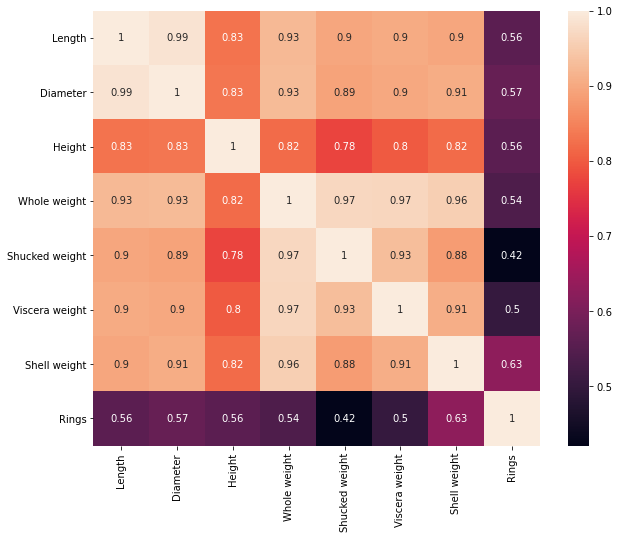

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True);

* Age is most linearly proprtional with Shell Weight followed by Diameter , length and height
* Age is least correlated with Shucked Weight

<Figure size 720x360 with 0 Axes>

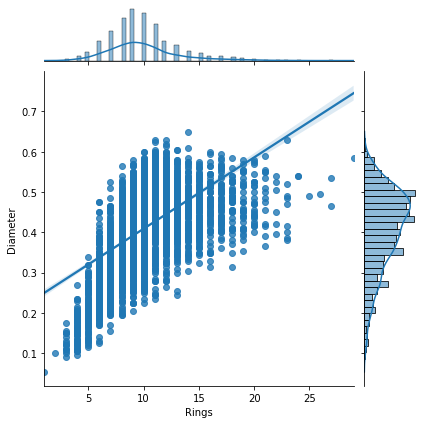

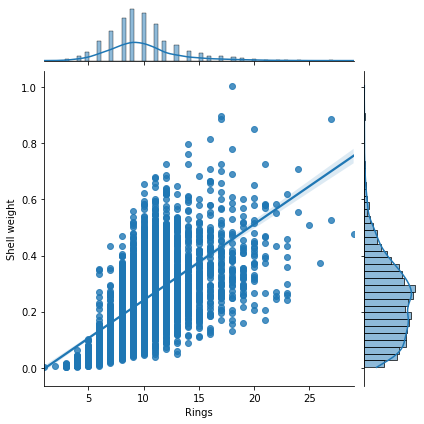

In [8]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=data, x='Rings', y='Diameter', kind='reg');
sns.jointplot(data=data, x='Rings', y='Shell weight', kind='reg');

* Analyzing the correlation matrix, we notice that Diameter and Shell weight are the attributes that most correlates to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings

#### Multivariate analysis

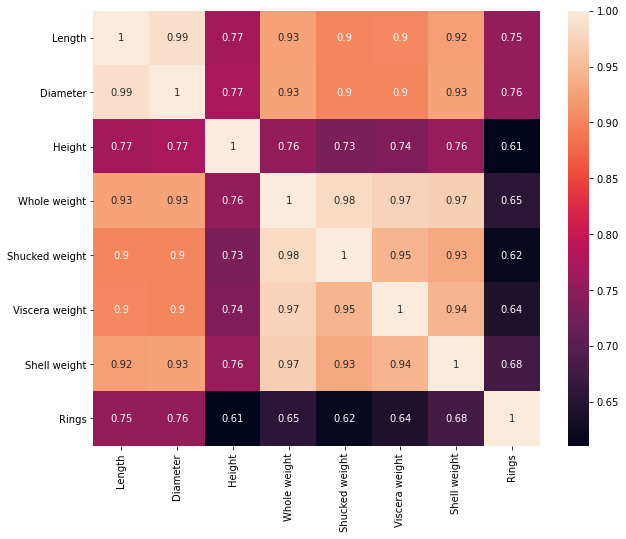

In [9]:
i_abalone = data[data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);

* Based on the  analysis the correlation regarding the number of rings , the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

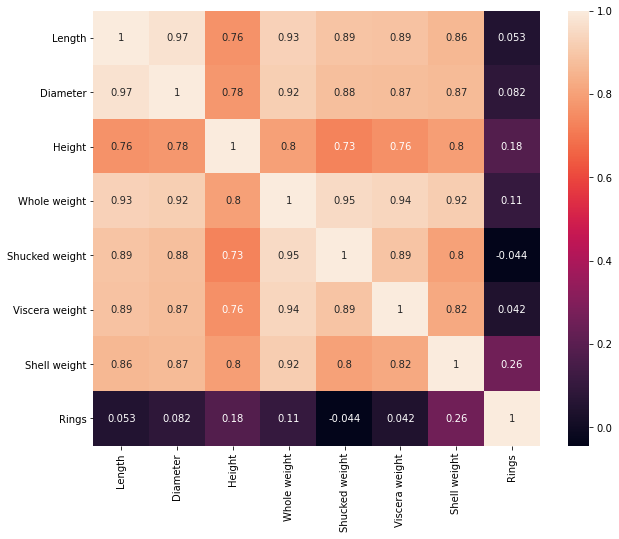

In [10]:
a_abalone = data[data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);

##### Influence of Sex on attributes

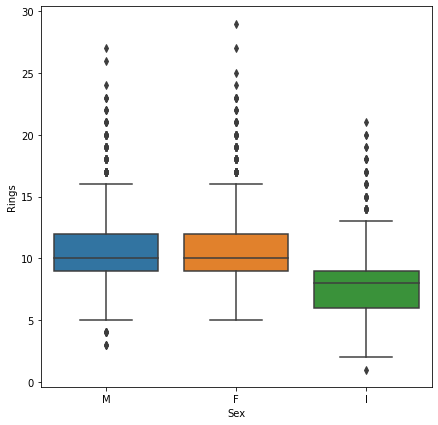

In [11]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Rings');

* Samples are concentrated around the mean of the distribution.The difference is that for Infant abalones the mean of Rings is lower.

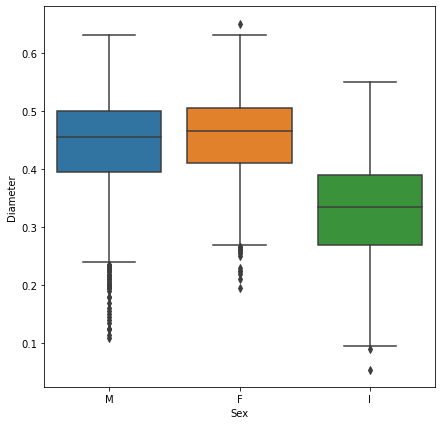

In [14]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Diameter');


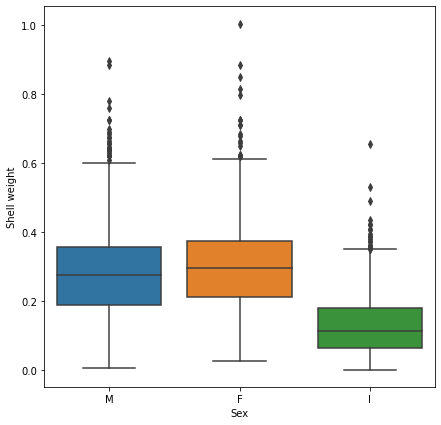

In [15]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Shell weight');

We analyze how the sex categories influence the correlations Rings & Diameter and Rings & Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Diamter and Shell weight have stronger correlation to rings.

<Figure size 1440x360 with 0 Axes>

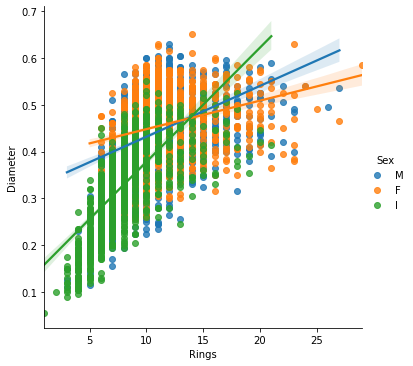

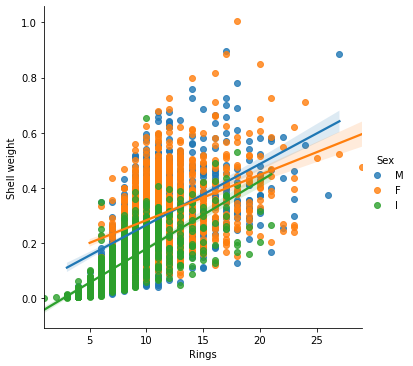

In [16]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=data, x='Rings', y='Diameter', hue='Sex', fit_reg=True);
sns.lmplot(data=data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

* We conclude that it is possible to build a model to predict the target value in function of the independent attributes.



In [17]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* From this we can assign infant=1, male=2 and female =0

Separating independent Features and dependent Features

In [39]:
X = data.drop('Rings', axis = 1) # Input/independent variable
Y = data. Rings # Target / dependent variable

Splitting the data into Train and test data

In [40]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.3, random_state = 42)

In [41]:
print(y_val.shape,y_train.shape, Y.shape)

(1254,) (2923,) (4177,)


In [42]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


Building a model

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [44]:
model.fit(X_train,y_train)   # train the model

RandomForestRegressor()

###### Predicting on test dataset

In [45]:
preds = model.predict(X)
print(preds[:1254])
print(Y[:1254].values)

[9.06 6.83 9.54 ... 6.66 8.16 6.22]
[15  7  9 ...  6  7  6]


In [46]:
pred = model.predict(X)
a=len(pred)
a


4177

In [47]:
preds = model.predict(X)
print(preds[:1259])
print(Y[:1259].values)

[9.06 6.83 9.54 ... 6.87 7.77 6.79]
[15  7  9 ...  7  8  8]


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)  ## Split data for train and test.
print(Y_train.shape, Y_test.shape,Y.shape)

(2923,) (1254,) (4177,)


In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [50]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import warnings
warnings.filterwarnings("ignore")
y_pred_rf = model.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(Y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         5
           4       0.29      0.36      0.32        11
           5       0.26      0.29      0.27        28
           6       0.39      0.32      0.35        85
           7       0.27      0.34      0.30       115
           8       0.36      0.35      0.35       193
           9       0.24      0.35      0.28       194
          10       0.28      0.35      0.31       192
          11       0.22      0.22      0.22       144
          12       0.09      0.05      0.06        87
          13       0.10      0.08      0.09        61
          14       0.07      0.03      0.04        36
          15       0.08      0.04      0.05        26
          16       0.12      0.05      0.07        22
          17       0.00      0.00      0.00        23
          18       0.00      0.00      0.00  

* From the trained model we have predicted X_val and evaluation of our model from the data

In [85]:
preds = model.predict(X_test)
print(preds[:1254])
print(Y_test[:1254].values)

[10  7  6 ... 11 10 10]
[10  8  8 ... 11 11 13]


In [86]:
preds = model.predict(X_test)
print(preds[:1256])
print(Y_test[:1256].values)

[10  7  6 ... 11 10 10]
[10  8  8 ... 11 11 13]


In [ ]:
#create dataframe for the predicted value

predicted_values= pd.Dataframe(preds)
predicted_values['Prediction']= preds
predicted_values

# Save the predicted values to csv file
predicted_values.to_csv('Abalone_predicted.csv')